In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

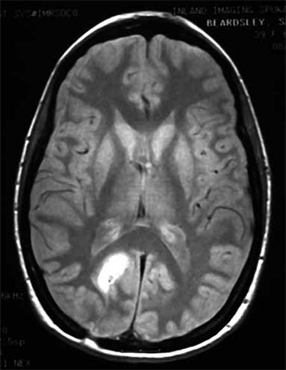

In [39]:
# Load the image using PIL
image = Image.open(r"C:\Users\Asad\Images\MRI_brain.png")

# Convert the image to grayscale
image = image.convert("L")
image

In [40]:
# COnvert PIL image to numpy array
image_np = np.array(image)
image_1d = image_np.reshape(-1,1)

In [41]:
# K-mean Clustering 
n_clusters= 5 #Clusters
kmean = KMeans(n_clusters)
cluster_assignments = kmean.fit_predict(image_1d)

C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
# reshap5e the cluster 
clustered_image=cluster_assignments.reshape(image_np.shape)

In [43]:
clustered_image.shape

(370, 286)

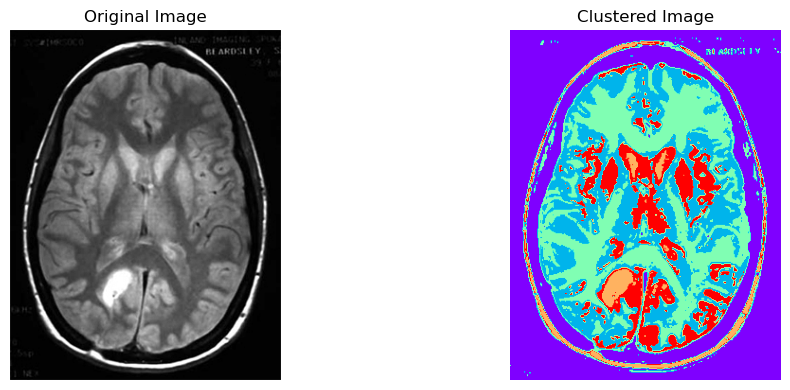

In [44]:
# plotting
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(clustered_image, cmap= 'rainbow')
plt.title('Clustered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [45]:
masks = []
for cluster_id in range(n_clusters):
    cluster_mask = (cluster_assignments == cluster_id).reshape(image_np.shape[:2])
    masks.append(cluster_mask)

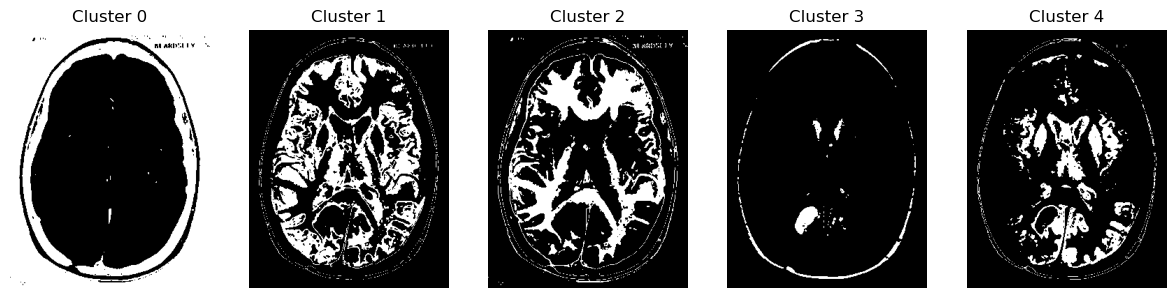

In [46]:
plt.figure(figsize=(18, 12))
for i in range(n_clusters):
    plt.subplot(1, n_clusters+1, i+2)
    plt.imshow(masks[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')

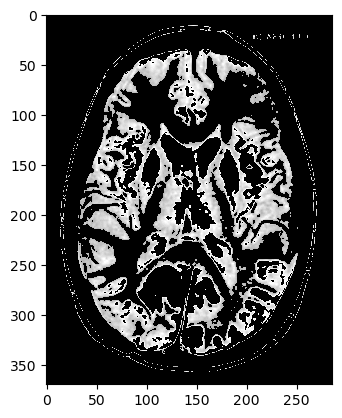

In [47]:
plt.imshow(image_np * masks[1], cmap='gray')